In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
#import the data
weather_data = pd.read_csv("dataset/weatherHistory.csv")
#view the data
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
#check the shape of the data
weather_data.shape

(96453, 12)

## Exploratory Data Analysis

In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


Remove features which do not have any impact on the prediction. The value of `Loud Cover` is the same for all rows, so we can remove it.

In [5]:
weather_data['Loud Cover'].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

In [6]:
#create a temporal copy of the dataset
df_temp = weather_data.copy() 

In [7]:
#removing the loud cover features
df_temp.drop("Loud Cover", axis=1, inplace=True)

In [8]:
df_temp.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [9]:
# Also we can remove the Daily summary features since it is text
df_temp["Daily Summary"].value_counts()

Mostly cloudy throughout the day.                                                                 20085
Partly cloudy throughout the day.                                                                  9981
Partly cloudy until night.                                                                         6169
Partly cloudy starting in the morning.                                                             5184
Foggy in the morning.                                                                              4201
                                                                                                  ...  
Partly cloudy throughout the day and windy starting in the morning continuing until afternoon.       24
Breezy in the morning and mostly cloudy starting in the morning.                                     24
Mostly cloudy throughout the day and windy starting in the morning continuing until evening.         24
Mostly cloudy overnight.                                        

<AxesSubplot:ylabel='Daily Summary'>

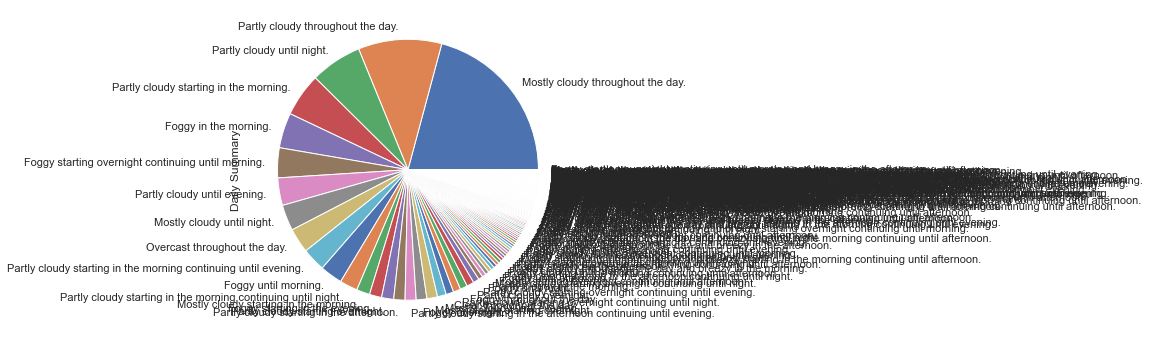

In [10]:
#first we can visualize using a pie chart
df_temp['Daily Summary'].value_counts().plot(kind="pie", figsize=(8,6))

In [11]:
df_temp.drop("Daily Summary", axis=1, inplace=True)

In [12]:
df_temp.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [13]:
#check missing values
df_temp.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [14]:
# I will use the Precip Type as output of the dataset
df_temp['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

Drop Null values

In [15]:
df_temp.dropna(inplace=True)

In [16]:
#check if we still have null values
df_temp.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [17]:
df_temp.shape

(95936, 10)

## Data Cleaning

In [18]:
#convert categorical data into numerical
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Formatted Date
Summary
Precip Type


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_temp['Precip Type'] = le.fit_transform(df_temp['Precip Type'])
df_temp['Summary'] = le.fit_transform(df_temp['Summary'])

In [20]:
df_temp.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


## Feature Engineering

In [21]:
from datetime import datetime

def discretize_date(current_date, t):
    current_date = current_date[:-10]
    cdate = datetime.strptime(current_date, '%Y-%m-%d %H:%M:%S')

    if t == 'hour_sin':
        return np.sin(2 * np.pi * cdate.hour/24.0)
    if t == 'hour_cos':
        return np.cos(2 * np.pi * cdate.hour/24.0)
    if t == 'day_sin':
        return np.sin(2 * np.pi * cdate.timetuple().tm_yday/365.0)
    if t == 'day_cos':
        return np.cos(2 * np.pi * cdate.timetuple().tm_yday/365.0)

In [22]:
date_types = ['hour_sin', 'hour_cos', 'day_sin', 'day_cos']
for dt in date_types:
    df_temp[dt] = df_temp['Formatted Date'].apply(lambda x : discretize_date(x, dt))
df_temp.drop(['Formatted Date'],axis=1,inplace=True)

In [23]:
# check correlation to drop unneccessary features
corr = df_temp.corr()
corr

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),hour_sin,hour_cos,day_sin,day_cos
Summary,1.000000,-0.116821,0.145821,0.141956,-0.112823,0.003068,0.023057,0.135659,0.144449,-0.115476,-0.126093,0.042354,-0.097738
Precip Type,-0.116821,1.000000,-0.563503,-0.566058,0.232622,-0.067771,-0.042142,-0.316483,0.009271,0.080189,0.077198,0.115773,0.414884
Temperature (C),0.145821,-0.563503,1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,-0.005253,-0.213442,-0.224880,-0.210074,-0.807055
Apparent Temperature (C),0.141956,-0.566058,0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,-0.000037,-0.201702,-0.206186,-0.215740,-0.815850
Humidity,-0.112823,0.232622,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,0.005375,0.366610,0.395050,-0.046786,0.392201
Wind Speed (km/h),0.003068,-0.067771,0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,-0.049453,-0.076933,-0.232838,0.134139,0.104584
Wind Bearing (degrees),0.023057,-0.042142,0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,-0.011629,-0.010008,0.006792,0.010820,-0.069343
Visibility (km),0.135659,-0.316483,0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,0.061011,-0.059377,0.153076,0.035113,-0.433034
Pressure (millibars),0.144449,0.009271,-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,1.000000,0.003404,0.013111,0.006703,-0.013925
hour_sin,-0.115476,0.080189,-0.213442,-0.201702,0.366610,-0.076933,-0.010008,-0.059377,0.003404,1.000000,-0.000010,-0.000182,0.000096


<AxesSubplot:>

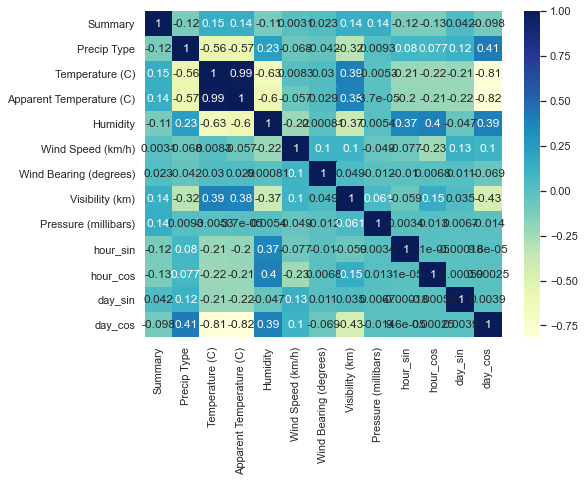

In [24]:
#visualize the correlation using seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr,
           fmt=".2g",
           cmap="YlGnBu",
           annot=True)

`Apparent Temperature` and `Temperature` are highly correlated of correlation almost equal to 1 so we can drop one of them.

In [25]:
df_temp.drop("Apparent Temperature (C)", axis = 1, inplace = True)

In [26]:
df_temp.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),hour_sin,hour_cos,day_sin,day_cos
0,19,0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0.000000,1.000000,0.999991,0.004304
1,19,0,9.355556,0.86,14.2646,259.0,15.8263,1015.63,0.258819,0.965926,0.999991,0.004304
2,17,0,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0.500000,0.866025,0.999991,0.004304
3,19,0,8.288889,0.83,14.1036,269.0,15.8263,1016.41,0.707107,0.707107,0.999991,0.004304
4,17,0,8.755556,0.83,11.0446,259.0,15.8263,1016.51,0.866025,0.500000,0.999991,0.004304


In [27]:
df_temp["Precip Type"].value_counts()

0    85224
1    10712
Name: Precip Type, dtype: int64

In [28]:
#splitting the data into features and label
X = df_temp.iloc[:,1:]
y = df_temp.iloc[:,0]

In [29]:
X.head()

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),hour_sin,hour_cos,day_sin,day_cos
0,0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0.000000,1.000000,0.999991,0.004304
1,0,9.355556,0.86,14.2646,259.0,15.8263,1015.63,0.258819,0.965926,0.999991,0.004304
2,0,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0.500000,0.866025,0.999991,0.004304
3,0,8.288889,0.83,14.1036,269.0,15.8263,1016.41,0.707107,0.707107,0.999991,0.004304
4,0,8.755556,0.83,11.0446,259.0,15.8263,1016.51,0.866025,0.500000,0.999991,0.004304


In [30]:
#splitting the data int training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
#check the shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76748, 11), (19188, 11), (76748,), (19188,))

In [32]:
X_train.head()

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),hour_sin,hour_cos,day_sin,day_cos
49839,0,20.811111,0.58,17.7422,319.0,11.2700,1011.34,-0.866025,-0.500000,0.729558,-0.683919
23605,0,26.966667,0.39,20.5597,223.0,10.3523,1010.61,-0.500000,-0.866025,0.693281,-0.720667
26053,0,16.022222,0.59,22.2663,49.0,11.2700,1023.83,-0.258819,-0.965926,-0.997917,-0.064508
3299,1,-7.172222,0.79,5.1681,211.0,4.9910,1035.62,0.258819,-0.965926,0.417194,0.908818
90469,0,6.144444,0.66,9.6439,357.0,10.5777,1026.16,-0.866025,-0.500000,0.580800,0.814046


In [33]:
#standardized the input data
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [34]:
#create a dictionary and a function to evaluate the models
models = {"RFC": RandomForestClassifier(),
         "DTC": DecisionTreeClassifier(),
         "ETC": ExtraTreesClassifier()}

def fit_and_train(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores   

In [35]:
model_scores = fit_and_train(models, X_train, X_test, y_train, y_test)
model_scores

{'RFC': 0.660464873879508,
 'DTC': 0.5386178861788617,
 'ETC': 0.6478007087763186}

In [36]:
df_plot = pd.DataFrame(model_scores,
                      index=["Accuracy score"])

In [37]:
df_plot

,RFC,DTC,ETC
Accuracy score,0.660465,0.538618,0.647801


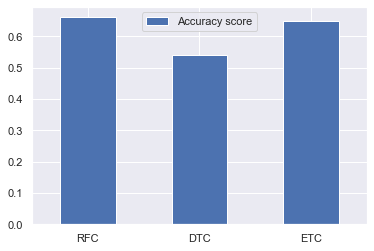

In [42]:
df_plot.T.plot(kind="bar")
plt.xticks(rotation=0)
plt.show()